# Procesamiento de datos utilizando python

##### `Procesamiento numérico`  


>`> Extracción de datos`

In [1]:
# Importando Librerias
import pandas as pd                 #Pandas
import matplotlib.pyplot as plt     #Matplot
import numpy as np                  #Numpy
import seaborn as sns               #seaborn
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','black','white']

In [2]:
pd.set_option("display.max_rows",4)
pd.set_option("display.max_columns",13)

`vistaexaminados y vistaasistencias`

In [24]:
json="https://tecnologica.utec.edu.sv/fica/services/vistaexaminados.php"
dfExam = pd.read_json(json)
dfAsis = pd.read_json('https://tecnologica.utec.edu.sv/fica/services/vistaasistencias.php')
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


>`> Limpieza de datos`

`vistaasistencias`

In [25]:
dfAsis.info()#sin valores nulos cantidad de registros son 9380 @ columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       9380 non-null   object
 1   codigo      9380 non-null   object
 2   facultad    9380 non-null   object
 3   area        9380 non-null   object
 4   materia     9380 non-null   object
 5   seccion     9380 non-null   int64 
 6   horario     9380 non-null   object
 7   dias        9380 non-null   object
 8   Inscritos   9380 non-null   int64 
 9   Asistencia  9380 non-null   int64 
 10  Modalidad   9380 non-null   object
dtypes: int64(3), object(8)
memory usage: 806.2+ KB


In [26]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['Asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131]
---


In [27]:
# Definimos el umbral del valor que vamos a sustituir
umbral = 5

# agrupando los datos del DataFrame dfAsis según las columnas 'codigo', 'horario' y 'dias' 
# y luego calculamos la media y hacemos redondeo en la columna 'Asistencia' dentro de cada 
# grupo.
media_asistencias = dfAsis.groupby(['codigo', 'horario', 'dias'])['Asistencia'].mean().round()


# Iterar sobre cada fila del DataFrame
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    asistencia = row['Asistencia']
    inscritos = row['Inscritos']

    # Verificar si el valor está dentro del umbral
    if asistencia < umbral:
        # Verificar si cumple las condiciones de código, horario y días
        if (codigo, horario, dias) in media_asistencias.index:
            # Calcular la media de asistencias para el código, horario y días específicos
            media = media_asistencias[(codigo, horario, dias)]
            
            # Sustituir el valor dentro del umbral por la media de asistencias
            dfAsis.at[index, 'Asistencia'] = media
        else:
            # No se encontró la combinación de código, horario y días en las medias calculadas
            # No se realiza ninguna sustitución
            pass

    # Verificar si la asistencia es mayor que los inscritos
    if asistencia > inscritos:
        # Obtener la asistencia más alta dentro del rango de opciones anteriores
        asistencia_maxima = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario) & (dfAsis['dias'] == dias)]['Asistencia'].max()
        
        # Sustituir el valor de asistencia por la asistencia máxima
        dfAsis.at[index, 'Asistencia'] = asistencia_maxima
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,78,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


In [16]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['Asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
---
Sección 2:
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
---
Sección 3:
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131]
---


In [28]:
# Contar el número de fechas para cada combinación de código, horario y sección
fecha_counts = dfAsis.groupby(['codigo', 'horario', 'seccion'])['fecha'].nunique()

# Filtrar los registros en los que hay más de una fecha
indices_a_eliminar = fecha_counts[fecha_counts == 1].index

# Eliminar los registros correspondientes a las combinaciones de código, horario y sección con una única fecha
dfAsis = dfAsis[~dfAsis.set_index(['codigo', 'horario', 'seccion']).index.isin(indices_a_eliminar)]

# Mostrar el DataFrame resultante
dfAsis
#9380 rows - 9366 rows = 14 rows eliminados por ser unicos

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,78,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


In [85]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['Asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
---
Sección 2:
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
---
Sección 3:
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131]
---


In [52]:
json="https://tecnologica.utec.edu.sv/fica/services/vistaexaminados.php"
dfExam = pd.read_json(json)
dfAsis = pd.read_json('https://tecnologica.utec.edu.sv/fica/services/vistaasistencias.php')

In [57]:
# eliminando los registros en los que el valor de 'Asistencia' sea mayor 
# que el valor de 'Inscritos' Ó el valor de 'Inscritos' sea menor al 90% 
# del valor de 'Asistencia "6890 filas"

dfAsis = dfAsis.drop(dfAsis[(dfAsis['Asistencia'] > dfAsis['Inscritos']) | (dfAsis['Inscritos'] 
        < 0.9 * dfAsis['Asistencia'])].index)

dfAsis


,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
2,2023-01-19,DIBA-I,Facultad de Informática y Ciencias Aplicadas,CIENCIAS APLICADAS AREA INDUSTRIAL Y MATEMATICAS,DIBUJO APLICADO,2,06:30-08:00,Ma-Jue,26,24,EN LINEA
3,2023-01-19,ECOE-B,Facultad de Ciencias Empresariales,NEGOCIOS,ECONOMÍA EMPRESARIAL,1,06:30-08:00,Ma-Jue,27,24,EN LINEA
...,...,...,...,...,...,...,...,...,...,...,...
9375,2023-03-07,ARAR2-DG,Facultad de Informática y Ciencias Aplicadas,CIENCIAS APLICADAS AREA ARQUITECTURA,ARTES GRÁFICAS II,1,08:00-09:30,Ma-Jue,64,55,PRESENCIAL
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,76,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


>`> Transformación de datos`

In [58]:
# transExam=dfExam.area
# list(transExam.drop_duplicates())
#evaluacion, tipo,examinados, asistencia

`vistaasistencias`

In [29]:
transColums=dfAsis.columns
transColums#mostrando columnas actuales

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Inscritos', 'Asistencia', 'Modalidad'],
      dtype='object')

In [31]:
# utilizando el método rename para cambiar el nombre de las columnas
# dfAsis.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)

dfAsis_copy = dfAsis.copy()
dfAsis_copy.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)

# imprime los nombres de las columnas actualizadas
print(dfAsis.columns)

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'inscritos', 'asistencia', 'modalidad'],
      dtype='object')


In [32]:
transFact=dfAsis.facultad
list(transFact.drop_duplicates())#virificando registros unicos

['Facultad de Derecho',
 'Facultad de Informática y Ciencias Aplicadas',
 'Facultad de Ciencias Empresariales',
 'Facultad de Ciencias Sociales']

In [33]:
# creando un diccionario para mapear los nombres antiguos y cambiarlos a los nuevos
mapeo_Fac = {"Facultad de Derecho": "Fac_Der", 
            "Facultad de Informática y Ciencias Aplicadas": "Fac_InCa",
            "Facultad de Ciencias Empresariales": "Fac_CiEmp",
            "Facultad de Ciencias Sociales": "Fac_CiSo"
            }
# utilizando el método replace para cambiar los nombres de los registros
dfAsis.loc[:, "facultad"] = dfAsis["facultad"].replace(mapeo_Fac)
# dfAsis["facultad"] = dfAsis["facultad"].replace(mapeo_Fac)

# mostrar la columna actualizada
print(dfAsis["facultad"])

0        Fac_Der
1       Fac_InCa
          ...   
9378    Fac_CiSo
9379    Fac_InCa
Name: facultad, Length: 9366, dtype: object


In [34]:
# dfExam['facultad']# comprobando datos en las columnas
dfAsis# comprobando datos en las columnas

,fecha,codigo,facultad,area,materia,seccion,horario,dias,inscritos,asistencia,modalidad
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,78,PRESENCIAL
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


In [36]:
# Calcular la columna de Inasistencia
dfAsis = dfAsis.assign(inasistencia=dfAsis['inscritos'] - dfAsis['asistencia'])
# dfAsis.loc[:, 'inasistencia'] = dfAsis['inscritos'] - dfAsis['asistencia']

# dfAsis['inasistencia'] = dfAsis['inscritos'] - dfAsis['asistencia']

# Mostrar el DataFrame resultante
dfAsis



,fecha,codigo,facultad,area,materia,seccion,horario,dias,inscritos,asistencia,modalidad,inasistencia
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA,5
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL,18
...,...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,78,PRESENCIAL,10
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL,8


>`> Estadísticas generadas`

`vistaasistencias`

#### 1- ¿Comportamiento de la asistencia de los estudiantes en las facultades?
#### 2- ¿Cuál es la relación entre la asistencia y el número de estudiantes inscritos en cada materia?

>`> Presentación de resultados` 

`vistaasistencias`

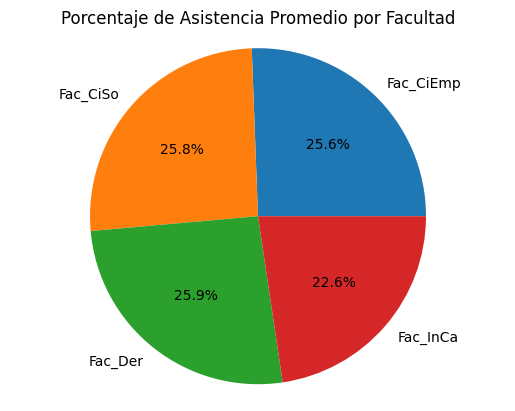

In [65]:
# Gráfico de pastel de la asistencia agrupados por facultad
asistencia_promedio_facultad = dfAsis.groupby('facultad')['asistencia'].mean()

plt.pie(asistencia_promedio_facultad, labels=asistencia_promedio_facultad.index, 
        autopct='%1.1f%%')
plt.title('Porcentaje de Asistencia Promedio por Facultad')
plt.axis('equal')
plt.show()

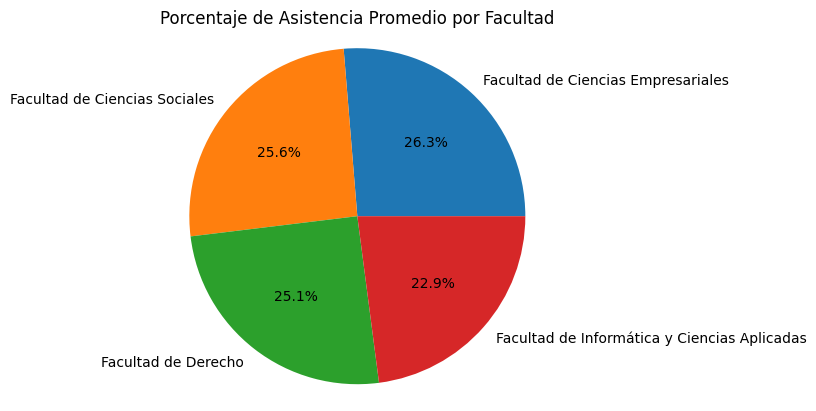

In [8]:
# Gráfico de pastel de la asistencia agrupados por facultad
asistencia_promedio_facultad = dfAsis.groupby('facultad')['Asistencia'].mean()

plt.pie(asistencia_promedio_facultad, labels=asistencia_promedio_facultad.index, 
        autopct='%1.1f%%')
plt.title('Porcentaje de Asistencia Promedio por Facultad')
plt.axis('equal')
plt.show()

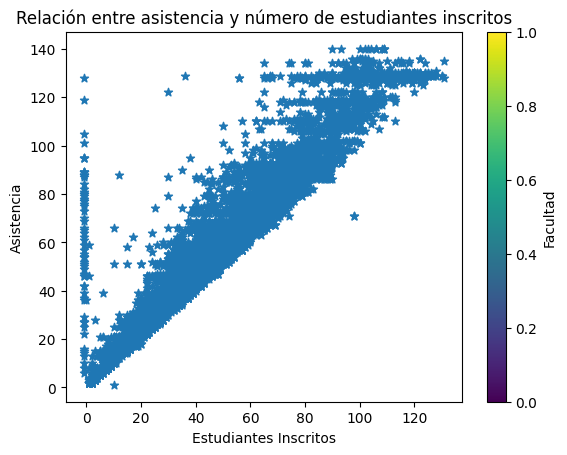

In [17]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

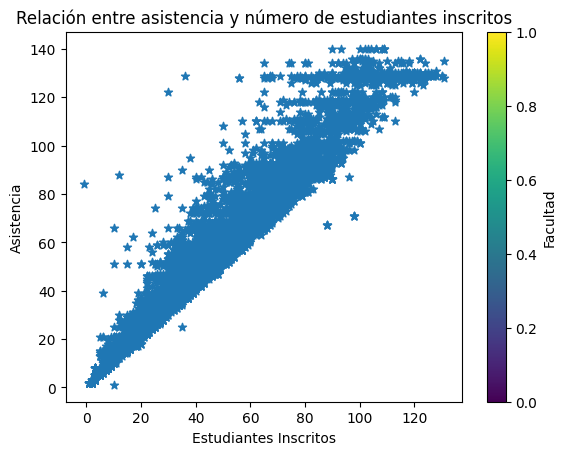

In [57]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

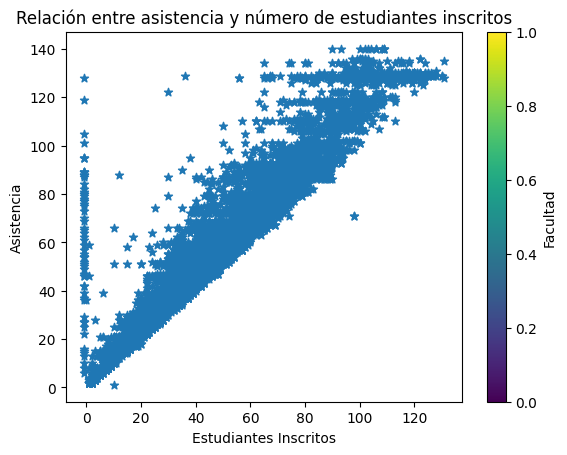

In [6]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

> ### `EXPORTACIÓN DE DATOS`

In [91]:
#dfExam.to_csv('exam_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD
dfAsis.to_csv('Asis_sinIndices_KYC.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD